# Reading dataset
In the below cell, the given dataset file is read into the jupyter notebook and lists of all the input parameters (age, bmi etc) and output parameter (charges) is created. The input parameters are normalized through the min-max normalization technique. This notebook has conducted linear regression only once after shuffling the given dataset. 20 models have been generated in the .py files attached along with this file. The purpose of creating this notebook is to document the approach taken by us in an easy to read manner.  

In [158]:
import numpy as np
import math
age=[]
bmi=[]
children=[]
charges=[]
one=[]
count=0
f = open('insurance.txt', 'r') #given file is read into the notebook

#below code stores all of the observations available to us through the input file into lists.
for i in f:
    if count>0:
        words = i.split(',')
        one.append(1)
        age.append(int(words[0]))
        bmi.append(float(words[1]))
        children.append(int(words[2]))
        charges.append(float(words[3]))
    count+=1

#Below code stores the minimum and maximum values of the observations for using the min-max normalization technique
age_max=max(age)
age_min=min(age)
bmi_max=max(bmi)
bmi_min=min(bmi)
children_max=max(children)
children_min=min(children)


for x in range(len(age)):
    age[x] = (age[x]-age_min)/(age_max-age_min) #normalizing data of age column
for x in range(len(bmi)):
    bmi[x]= (bmi[x]-bmi_min)/(bmi_max-bmi_min) #normalizing data of bmi column
for x in range(len(children)):
    children[x]= (children[x]-children_min)/(children_max-children_min) #normalizing data of no. of children column

In [159]:
q = np.array([one, age, bmi, children, charges])
q = np.transpose(q)
np.random.shuffle(q) #this line shuffles the dataset as a preprocessing measure
w = q
w = np.delete(w, 4, axis=1)
Data = np.asmatrix(q)
#Data contains all input parameters along with the output in order
Data_transpose = Data.transpose()
Y = np.delete(Data, [0,1,2,3], axis=1)
#Y only contains the output
X = np.asmatrix(w)
#X only contains the input parameters
train_count = math.floor(count*0.7)
test_count = count - train_count
Y_train, Y_test = np.split(Y, [train_count])
X_train, X_test = np.split(X, [train_count])
#X_train and Y_train consist of 70% of the datapoints and are used for training the regression models
#X_test and Y_test contain 30% of the datapoints upon which the regression models are tested on

# Linear Regression using Normal Equation

In [160]:
X_train_transpose = X_train.transpose()
Mult = np.matmul(X_train_transpose, X_train)
Multinv=np.linalg.inv(np.matrix(Mult))
Multinv = np.asmatrix(Multinv)
Product = np.matmul(Multinv, X_train_transpose)
Result = np.matmul(Product, Y_train)
#Result is the matrix containing the parameters which are optimized by linear regression
Y_bar_test = np.matmul(X_test, Result)
Y_bar_train = np.matmul(X_train, Result)
print(Result)
#The normal equation which has been implemented in this codeblock is:
# Theta(Result) = ((X^T)*X)^-1 * ((X^T)*Y)
#Here, X^T = X transpose

[[ 2674.62350305]
 [10007.37501889]
 [13505.38112268]
 [ 2002.04152602]]


In [161]:
Error_test = Y_test-Y_bar_test #Error matrix of testing data
Error_train = Y_train-Y_bar_train #Error matrix of training data
rmse_train=0
rmse_test=0
for i in Error_test:
    rmse_test+=i*i
for i in Error_train:
    rmse_train+=i*i
rmse_train = rmse_train/train_count
rmse_train = math.sqrt(rmse_train)
rmse_test = rmse_test/test_count
rmse_test = math.sqrt(rmse_test)
print('RMSE of testing data = ' + str(rmse_test))
print('RMSE of training data = ' + str(rmse_train))
#RMSE is the root mean square value. In this codeblock, the RMSE values for the training dataset
#and the testing dataset are calculated

RMSE of testing data = 11753.20328666585
RMSE of training data = 11186.655617441813


# Linear Regression using Gradient Descent

Linear Regression has been done through the gradient descent algorithm in the below cells. The algorithm was run on the training data, and using the theta values thus calculated, a plot was made between the cost function of the testing data (cost function obtained by using the theta values calculated) and the epochs. The RMSE errors of both the training and the testing data have been given as well. The cost function values for the testing data after each 50 consecutive iterations has been printed as well. The algorithm has been run thrice, with learning rates 0.001, 0.01 and 0.1

In [162]:
#A function to calculate the cost function for the given values is written in this cell
#The value of theta which minimizes this cost function is the best fit line for the given data
def cost_funct(theta, X, Y):
    m = test_count
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-Y))
    return cost

In [163]:
#A function to implement the gradient descent algorithm has been written in this cell
#The algorithm runs on the training data and optimizes the value of theta
def grad_descent(X, Y, theta, alpha, iterations):
    m = X.shape[0]
    for it in range(iterations):
        prediction = np.dot(X, theta)
        #prediction is the Y bar matrix, or matrix containing predicted values of output
        theta = theta - (np.dot(X.transpose(), prediction-Y) * (1/m) * alpha)
        #theta is the matrix containing the parameters which are optimized by linear regression
        theta_history.append(theta) #theta_history stores all the values of theta obtained after every iteration
    return theta
initial = np.array([1, 1, 1, 1])
theta_history = []
theta = np.asmatrix(initial)
#input parameters are initialized to 1 so that they can be optimized through gradient descent 
theta = theta.transpose()
theta = grad_descent(X_train, Y_train, theta, 0.001, 2000)

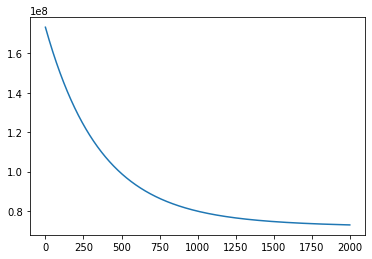

In [164]:
import matplotlib.pyplot as plt
cost_history=[]
for i in theta_history:
    cost_history.append(cost_funct(i, X_test, Y_test))
plt.plot(cost_history)
plt.show()
#Plot of cost function of testing data wrt. no. of iterations where learning rate is 0.001

In [165]:
toprint=[]
r=0
for i in cost_history:
    r+=1
    if r%50==0:
        toprint.append(i)
print("Cost function value after each 50 consecutive iterations: ")
print(toprint)

Cost function value after each 50 consecutive iterations: 
[160579386.8475562, 149410586.5374941, 139693711.6473089, 131237127.12175208, 123874677.7382764, 117462287.22993901, 111875012.2519263, 107004490.29534793, 102756728.8094884, 99050189.85816424, 95814130.75370787, 92987166.4102395, 90516023.74615112, 88354462.43924344, 86462339.7791087, 84804800.34148063, 83351573.79015467, 82076366.34722081, 80956333.40807231, 79971622.45408112, 79104976.86770685, 78341392.5122182, 77667820.02721038, 77072906.73426221, 76546772.8639323, 76080817.52276717, 75667550.43173851, 75300445.99823296, 74973816.74337518, 74682703.50459108, 74422780.17815447, 74190271.06514506, 73981879.14296007, 73794723.80861793, 73626286.83420756, 73474365.44298503, 73337031.56027684, 73212596.41952933, 73099579.81315091, 72996683.37249036]


In [166]:
train_error = cost_funct(theta, X_train, Y_train)
test_error = cost_funct(theta, X_test, Y_test)
print("Minimum cost function on training data obtained: " + str(train_error))
print("Minimum cost function on testing data obtained: " + str(test_error))
prediction_train = np.dot(X_train, theta)
prediction_test = np.dot(X_test, theta)
rmse_train_error = math.sqrt(np.mean(np.square(prediction_train-Y_train)))
rmse_test_error = math.sqrt(np.mean(np.square(prediction_test-Y_test)))
print("RMSE of training dataset: " + str(rmse_train_error))
print("RMSE of testing dataset: " + str(rmse_test_error))

Minimum cost function on training data obtained: 152086762.15885678
Minimum cost function on testing data obtained: 72996683.37249036
RMSE of training dataset: 11423.624941514752
RMSE of testing dataset: 12097.827903336976


In [167]:
theta = np.asmatrix(initial)
#input parameters are initialized to 1 so that they can be optimized through gradient descent 
theta = theta.transpose()
theta_history=[]
theta = grad_descent(X_train, Y_train, theta, 0.01, 1000)

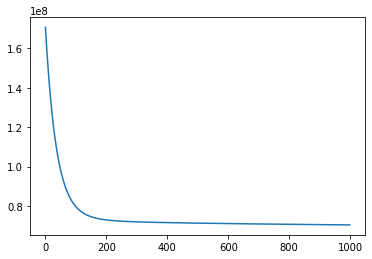

In [168]:
cost_history=[]
for i in theta_history:
    cost_history.append(cost_funct(i, X_test, Y_test))
plt.plot(cost_history)
plt.show()
#Plot of cost function of testing data wrt. no. of iterations where learning rate is 0.01

In [169]:
toprint=[]
r=0
for i in cost_history:
    r+=1
    if r%50==0:
        toprint.append(i)
print("Cost function value after each 50 consecutive iterations: ")
print(toprint)

Cost function value after each 50 consecutive iterations: 
[98826288.80006549, 79854281.22888793, 74632629.90466051, 72975337.11847742, 72320314.1795671, 71983635.39314294, 71764761.15539075, 71597116.07432249, 71455477.67345926, 71329129.11359967, 71213089.17339116, 71104859.91430137, 71003085.31304981, 70906956.2163065, 70815934.52877265, 70729622.0578403, 70647697.08498392, 70569883.21188346, 70495933.74136415, 70425623.58796272]


In [170]:
train_error = cost_funct(theta, X_train, Y_train)
test_error = cost_funct(theta, X_test, Y_test)
print("Minimum cost function on training data obtained: " + str(train_error))
print("Minimum cost function on testing data obtained: " + str(test_error))
prediction_train = np.dot(X_train, theta)
prediction_test = np.dot(X_test, theta)
rmse_train_error = math.sqrt(np.mean(np.square(prediction_train-Y_train)))
rmse_test_error = math.sqrt(np.mean(np.square(prediction_test-Y_test)))
print("RMSE of training dataset: " + str(rmse_train_error))
print("RMSE of testing dataset: " + str(rmse_test_error))

Minimum cost function on training data obtained: 148735153.48816243
Minimum cost function on testing data obtained: 70425623.58796272
RMSE of training dataset: 11297.04976572496
RMSE of testing dataset: 11882.865696829316


In [171]:
theta = np.asmatrix(initial)
#input parameters are initialized to 1 so that they can be optimized through gradient descent 
theta = theta.transpose()
theta_history=[]
theta = grad_descent(X_train, Y_train, theta, 0.1, 1000)

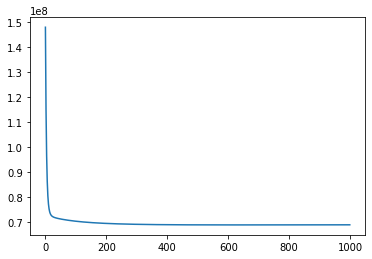

In [172]:
cost_history=[]
for i in theta_history:
    cost_history.append(cost_funct(i, X_test, Y_test))
plt.plot(cost_history)
plt.show()
#Plot of cost function of testing data wrt. no. of iterations where learning rate is 0.1

In [173]:
toprint=[]
r=0
for i in cost_history:
    r+=1
    if r%50==0:
        toprint.append(i)
print("Cost function value after each 50 consecutive iterations: ")
print(toprint)

Cost function value after each 50 consecutive iterations: 
[71322666.32784024, 70421595.10474183, 69879563.99499774, 69540065.23667924, 69321721.08476523, 69179033.42848863, 69085332.82276167, 69024255.10684462, 68985340.31234945, 68961670.65325, 68948546.86724882, 68942712.29587995, 68941877.80441956, 68944419.22676504, 68949178.10069552, 68955326.77202453, 68962275.04997396, 68969604.48971744, 68977021.49292727, 68984323.47782592]


In [174]:
train_error = cost_funct(theta, X_train, Y_train)
test_error = cost_funct(theta, X_test, Y_test)
print("Minimum cost function on training data obtained: " + str(train_error))
print("Minimum cost function on testing data obtained: " + str(test_error))
prediction_train = np.dot(X_train, theta)
prediction_test = np.dot(X_test, theta)
rmse_train_error = math.sqrt(np.mean(np.square(prediction_train-Y_train)))
rmse_test_error = math.sqrt(np.mean(np.square(prediction_test-Y_test)))
print("RMSE of training dataset: " + str(rmse_train_error))
print("RMSE of testing dataset: " + str(rmse_test_error))

Minimum cost function on training data obtained: 145880671.2836057
Minimum cost function on testing data obtained: 68984323.47782592
RMSE of training dataset: 11188.11973353187
RMSE of testing dataset: 11760.642347226689


# Linear Regression using Stochastic Gradient Descent

In [175]:
def stochastic_grad_descent(X, Y, theta, alpha, iterations):
    m = X.shape[0]
    cost_history = []
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind]
            Y_i = Y[rand_ind]
            prediction = np.dot(X_i, theta)
            theta = theta - ((1/m)*(alpha)*(X_i.transpose().dot((prediction-Y_i))))
            cost+= cost_funct(theta, X_i, Y_i)
        theta_history.append(theta)
        cost_history.append(cost)
    return theta, cost_history

In [187]:
cost_history = []
theta = np.asmatrix(initial)
theta = theta.transpose()
theta_history = []
theta, cost_history = stochastic_grad_descent(X_train, Y_train, theta, 0.001, 200)

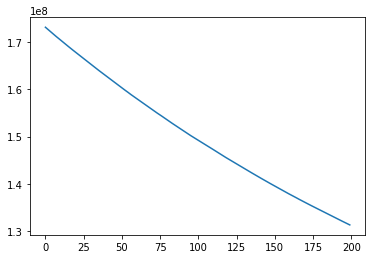

In [188]:
cost_history = []
for i in theta_history:
    cost_history.append(cost_funct(i, X_test, Y_test))
plt.plot(cost_history)
plt.show()
#Plot of cost function of testing data wrt. no. of iterations where learning rate is 0.001

In [189]:
toprint=[]
r=0
for i in cost_history:
    r+=1
    if r%50==0:
        toprint.append(i)
print("Cost function value after each 50 consecutive iterations: ")
print(toprint)

Cost function value after each 50 consecutive iterations: 
[160555157.42297673, 149410950.48075363, 139719375.40007582, 131323153.38964623]


In [190]:
train_error = cost_funct(theta, X_train, Y_train)
test_error = cost_funct(theta, X_train, Y_train)
prediction_train = np.dot(X_train, theta)
prediction_test = np.dot(X_test, theta)
rmse_train = math.sqrt(np.mean(np.square(prediction_train-Y_train)))
rmse_test = math.sqrt(np.mean(np.square(prediction_test-Y_test)))
print("Cost function value of training data after 200 SGD iterations = " + str(train_error))
print("Cost function value of testing data after 200 SGD iterations = " + str(test_error))
print("RMSE of training data = " + str(rmse_train))
print("RMSE of testing data = " + str(rmse_test))

Cost function value of training data after 200 SGD iterations = 271212181.2719587
Cost function value of testing data after 200 SGD iterations = 271212181.2719587
RMSE of training data = 15255.021523716903
RMSE of testing data = 16226.56109902643


In [179]:
cost_history = []
theta = np.asmatrix(initial)
theta = theta.transpose()
theta_history = []
theta, cost_history = stochastic_grad_descent(X_train, Y_train, theta, 0.01, 200)

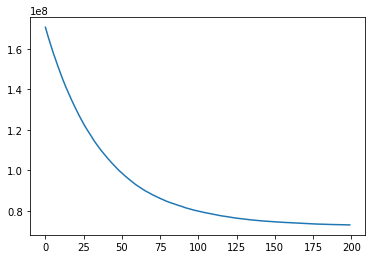

In [180]:
cost_history = []
for i in theta_history:
    cost_history.append(cost_funct(i, X_test, Y_test))
plt.plot(cost_history)
plt.show()
#Plot of cost function of testing data wrt. no. of iterations where learning rate is 0.01

In [181]:
toprint=[]
r=0
for i in cost_history:
    r+=1
    if r%50==0:
        toprint.append(i)
print("Cost function value after each 50 consecutive iterations: ")
print(toprint)

Cost function value after each 50 consecutive iterations: 
[99334336.94495022, 79982535.11142287, 74600982.26057652, 73024839.64470568]


In [182]:
train_error = cost_funct(theta, X_train, Y_train)
test_error = cost_funct(theta, X_train, Y_train)
prediction_train = np.dot(X_train, theta)
prediction_test = np.dot(X_test, theta)
rmse_train = math.sqrt(np.mean(np.square(prediction_train-Y_train)))
rmse_test = math.sqrt(np.mean(np.square(prediction_test-Y_test)))
print("Cost function value of training data after 200 SGD iterations = " + str(train_error))
print("Cost function value of testing data after 200 SGD iterations = " + str(test_error))
print("RMSE of training data = " + str(rmse_train))
print("RMSE of testing data = " + str(rmse_test))

Cost function value of training data after 200 SGD iterations = 152124023.12334758
Cost function value of testing data after 200 SGD iterations = 152124023.12334758
RMSE of training data = 11425.024238893668
RMSE of testing data = 12100.160864776746


In [191]:
cost_history = []
theta = np.asmatrix(initial)
theta = theta.transpose()
theta_history = []
theta, cost_history = stochastic_grad_descent(X_train, Y_train, theta, 0.1, 200)

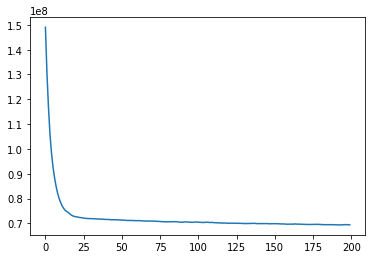

In [192]:
cost_history = []
for i in theta_history:
    cost_history.append(cost_funct(i, X_test, Y_test))
plt.plot(cost_history)
plt.show()
#Plot of cost function of testing data wrt. no. of iterations where learning rate is 0.1

In [193]:
toprint=[]
r=0
for i in cost_history:
    r+=1
    if r%50==0:
        toprint.append(i)
print("Cost function value after each 50 consecutive iterations: ")
print(toprint)

Cost function value after each 50 consecutive iterations: 
[71348473.16605449, 70552829.69369188, 69856702.08441883, 69409585.87504074]


In [194]:
train_error = cost_funct(theta, X_train, Y_train)
test_error = cost_funct(theta, X_train, Y_train)
prediction_train = np.dot(X_train, theta)
prediction_test = np.dot(X_test, theta)
rmse_train = math.sqrt(np.mean(np.square(prediction_train-Y_train)))
rmse_test = math.sqrt(np.mean(np.square(prediction_test-Y_test)))
print("Cost function value of training data after 200 SGD iterations = " + str(train_error))
print("Cost function value of testing data after 200 SGD iterations = " + str(test_error))
print("RMSE of training data = " + str(rmse_train))
print("RMSE of testing data = " + str(rmse_test))

Cost function value of training data after 200 SGD iterations = 147406422.88310593
Cost function value of testing data after 200 SGD iterations = 147406422.88310593
RMSE of training data = 11246.47526891891
RMSE of testing data = 11796.836619334597
